# Panel 2

### Packages

In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
figpath = "data/plot/paper/panel_2/"
figpathdat = f"{figpath}lattices/"
os.makedirs(figpathdat, exist_ok=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [ ]:
import_on = True
plist = [0.01, 0.025, 0.051, 0.08, 0.103, 0.12, 0.206]

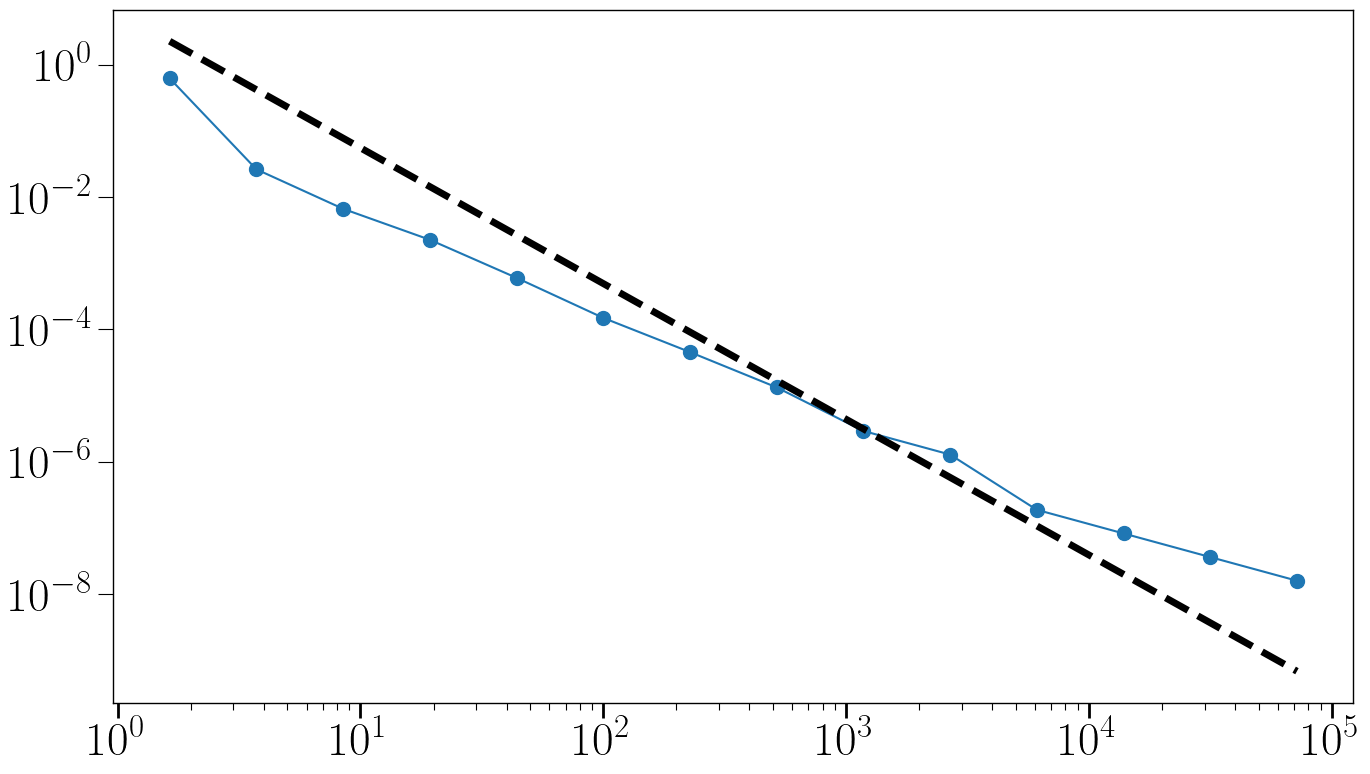

In [10]:

for i in [128]:
    with open(f"data/l2d_squared_CLUSTER/lrgsg/N={i**2}/p=0.12_na=512_.pickle", 'rb') as file:
        loaded_data = pk.load(file)
    
    b,h, bw = log_binning(loaded_data, binnum=15)
    plt.plot(b, h/(bw * h.sum()), 'o-', ms=10)
plt.plot(b, 10*(h/(bw * h.sum()))[0]*b**-2.05, lw=5, ls='--', c='k')
plt.yscale('log')
plt.xscale('log')

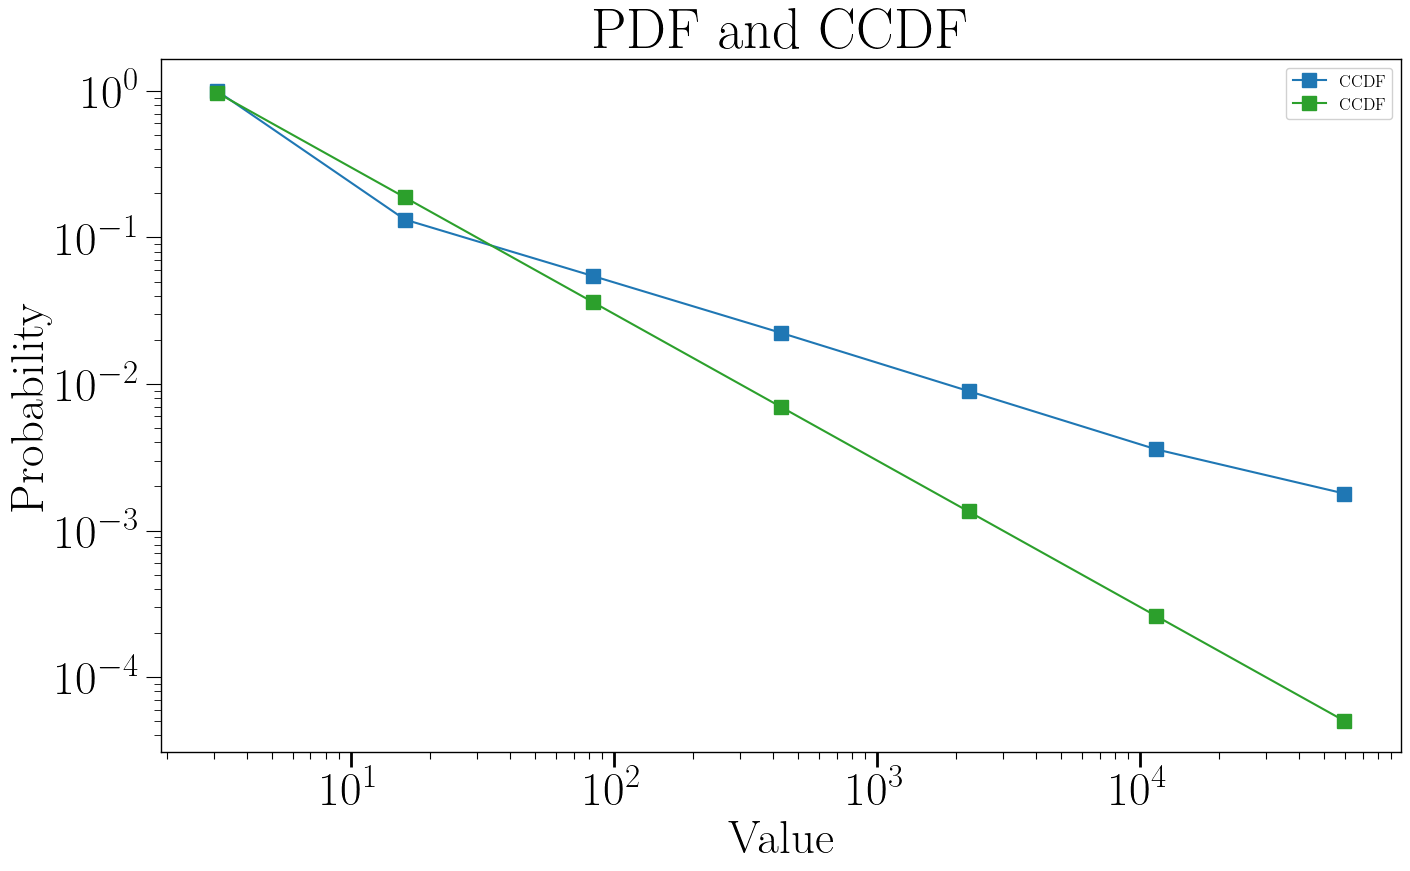

In [159]:
# Assuming log_binning function is defined and loaded_data is available
b, h, bw = log_binning(loaded_data, binnum=8)

# Calculate the CCDF
# Reverse the cumulative sum to start from the right, then normalize by the total count
ccdf = np.cumsum(h[::-1])[::-1] / h.sum()

# Plot the PDF (as you've done)
# plt.plot(b, h / (bw * h.sum()), 'o', ms=10, label='PDF')

# Plot the CCDF
plt.plot(b, ccdf, 's-', ms=10, label='CCDF')
plt.plot(b, 3*ccdf[0]*b**-1, 's-', ms=10, label='CCDF')
# Log scale for x-axis, if applicable
plt.xscale('log')

# Log scale for y-axis to better visualize CCDF on logarithmic scale
plt.yscale('log')

# Labeling
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('PDF and CCDF')
plt.legend()



In [114]:
with open(f"data/l2d_squared_CLUSTER/lrgsg/N={4096}/p=0.12_na=512_.pickle", 'rb') as file:
        loaded_data = pk.load(file)

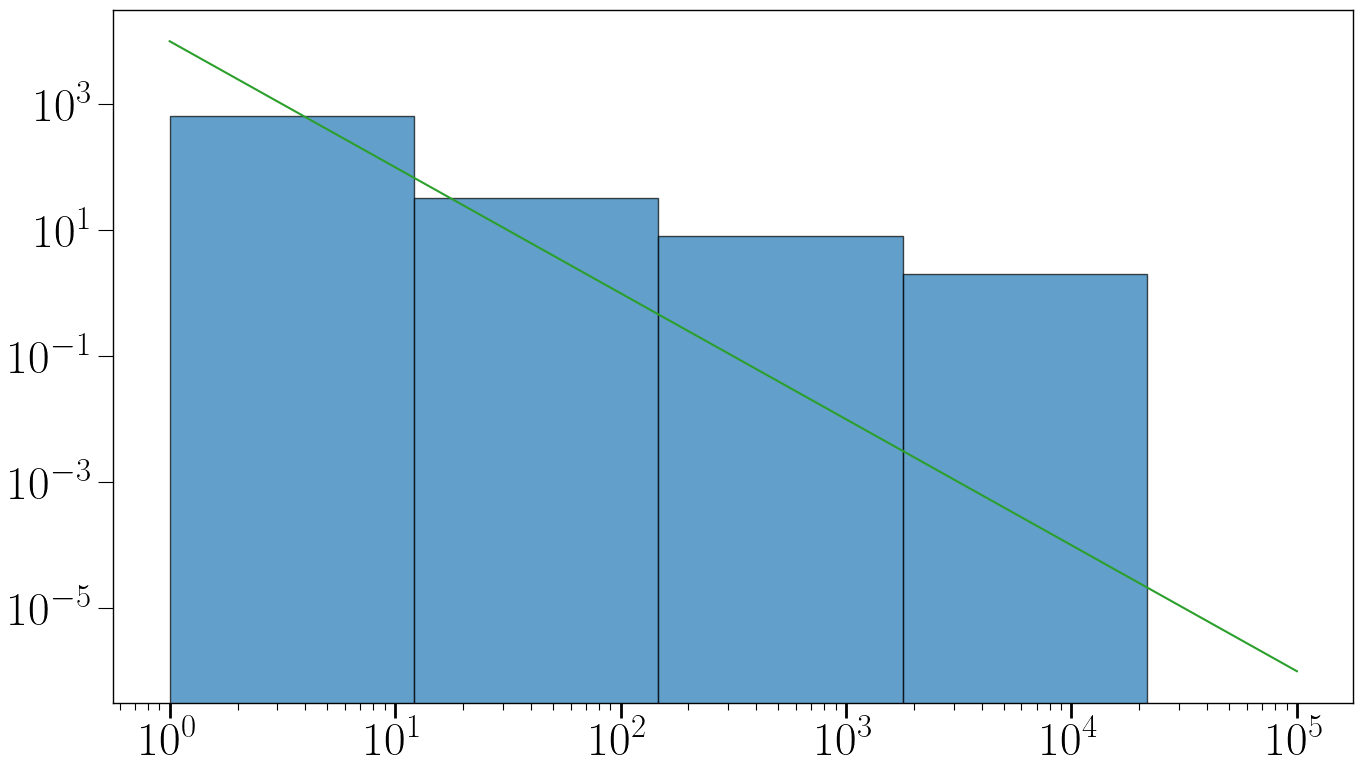

In [115]:
min_exp, max_exp = np.log10(min(loaded_data)), np.log10(max(loaded_data))
num_bins = 5  # You can adjust this based on your specific needs
bin_edges = np.logspace(min_exp, max_exp, num_bins)
plt.hist(loaded_data, bins=bin_edges, edgecolor='k', alpha=0.7)
plt.yscale('log')
plt.xscale('log')
x = np.logspace(0, 5)
plt.plot(x, 10000*x**-2)

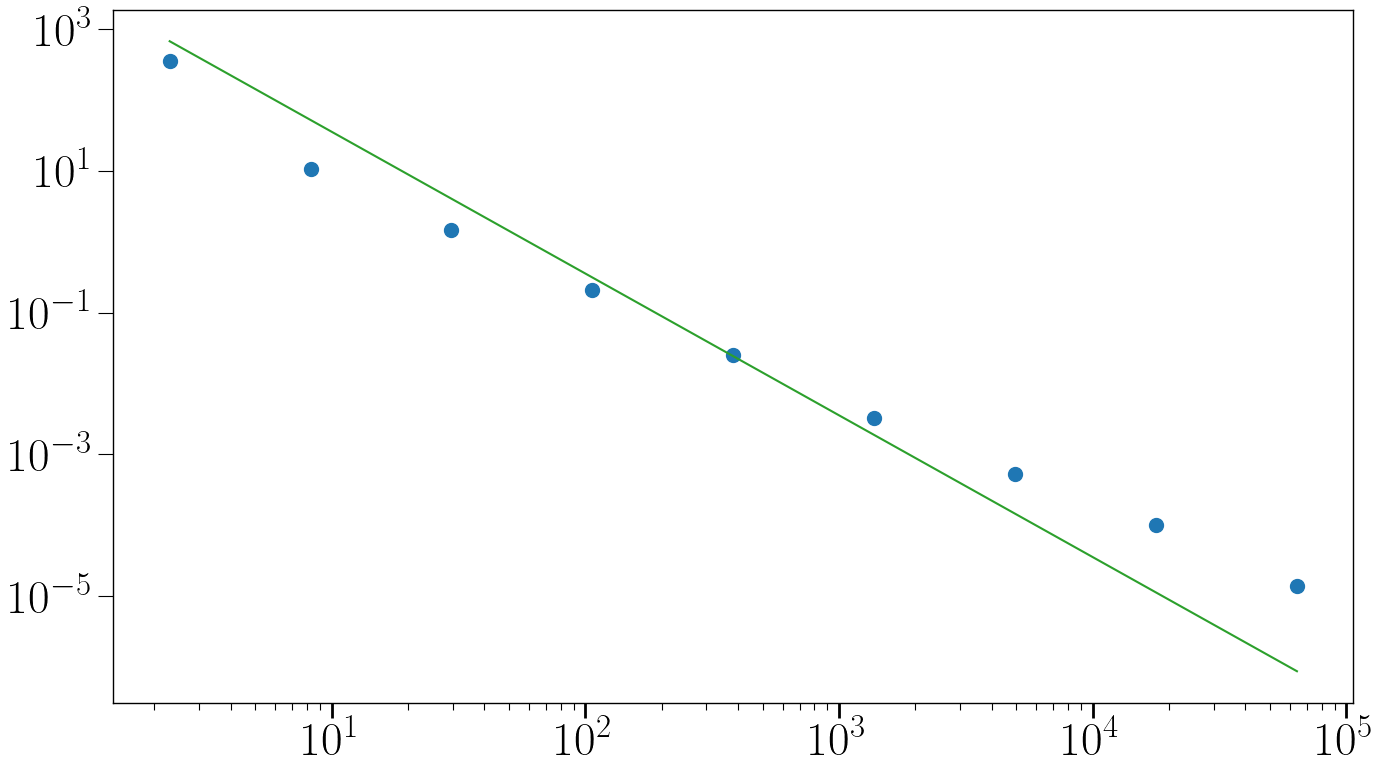

In [73]:
b,h, bw = log_binning(loaded_data, binnum=10)
plt.plot(b, h/bw, 'o', ms=10)
plt.plot(b, 10*(h/bw)[0]*b**-2)
plt.yscale('log')
plt.xscale('log')

### Fig. a

In [3]:
if import_on:
    arr_list = [np.load(f"{figpathdat}p={pfl:.3g}.npy") for pfl in plist]
else:
    arr_list = []
    for pfl in tqdm(plist):
        opts = dict(side1 = 512, geometry = 'squared', pflip = pfl)
        lattice = Lattice2D(**opts)
        lattice.flip_random_fract_edges()
        lattice.compute_k_eigvV()
        arr = lattice.eigV[0].reshape(lattice.syshape)
        np.save(f"{figpathdat}p={lattice.pflip:.3g}.npy", arr)
        arr_list.append(arr)

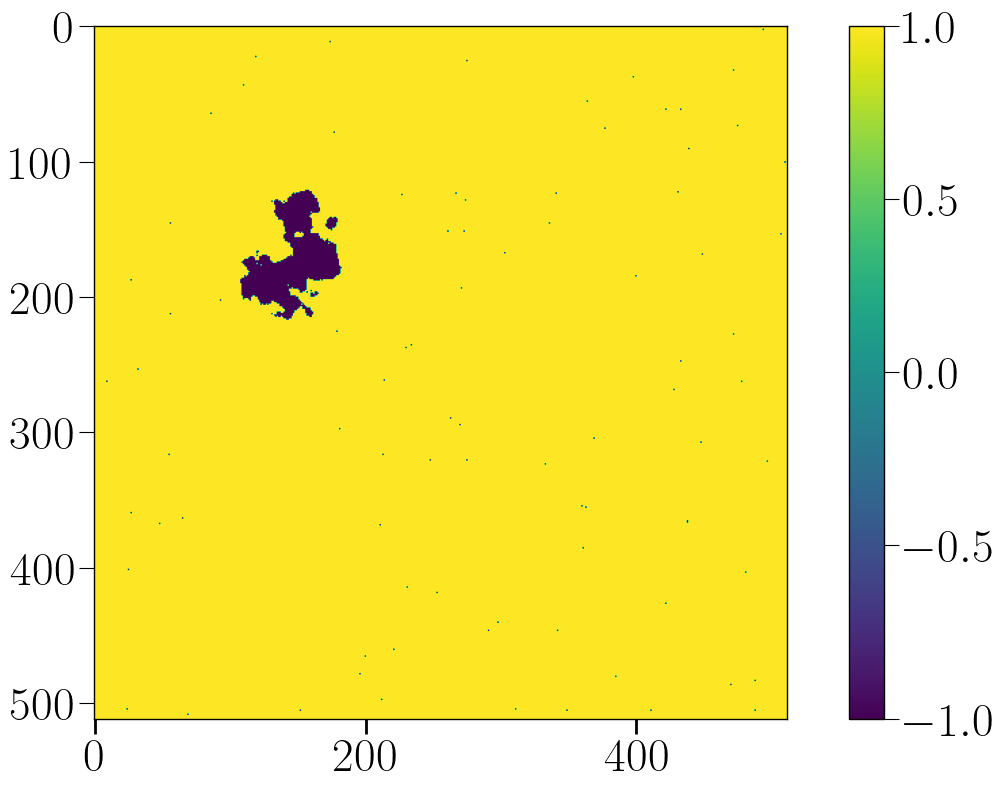

In [27]:
arr = np.load(f"{figpathdat}p=0.01.npy")
# arrneglog = np.nan_to_num(np.log(np.where(arr < 0, -arr, 0)), neginf=0)
# arrposlog = np.nan_to_num(np.log(np.where(arr > 0, arr, 0)), neginf=0)
# arrnan =  np.nan_to_num(np.log(arr), nan=0) - np.nan_to_num(np.log(-arr), nan=0) 
plt.imshow(np.where(arr>0, -1, 1))
plt.colorbar()

In [11]:
with open("data/l2d_squared/lrgsg/N=1024/p=0.11_na=100_.pickle", 'rb') as file:
    loaded_data = pickle.load(file)
binc, hist, bw = log_binning(loaded_data, 10)

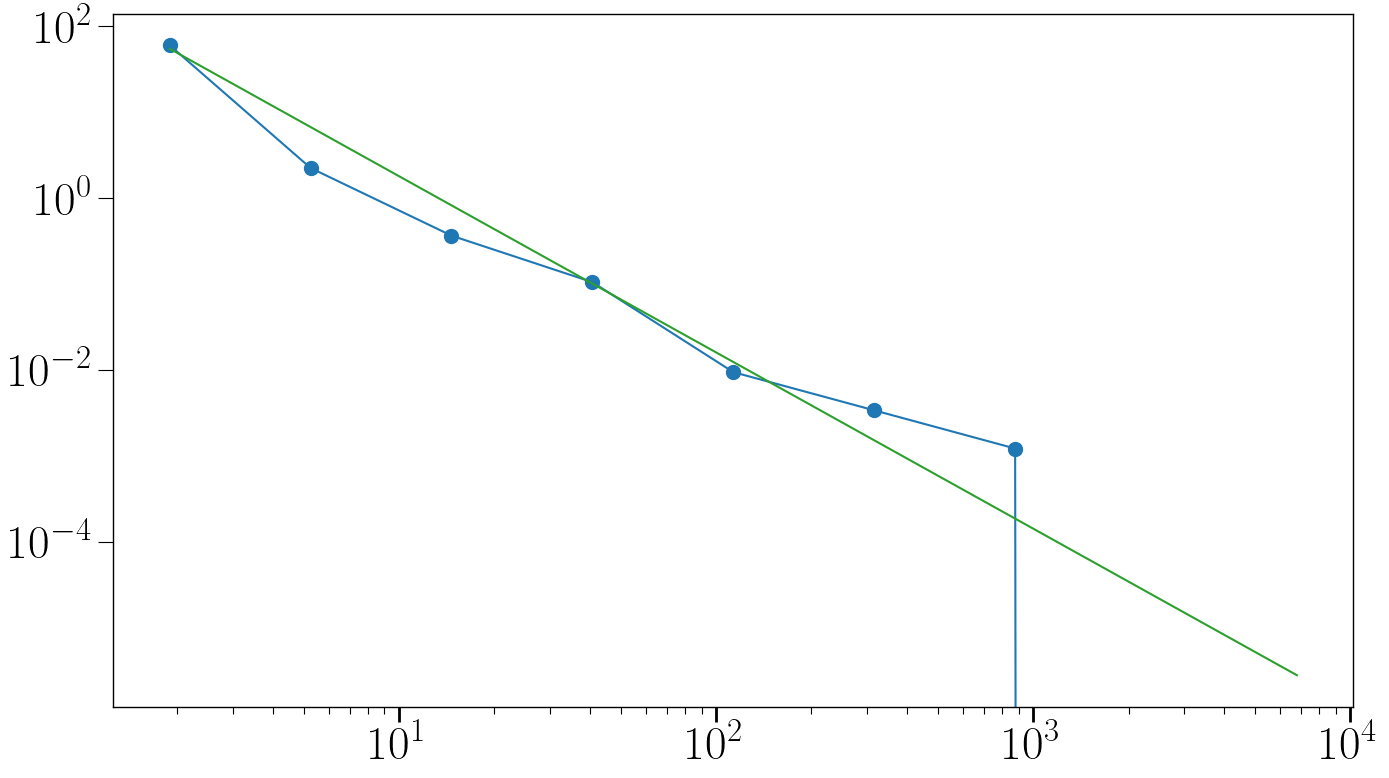

In [22]:
plt.plot(binc, hist/bw, 'o-', ms=10)
plt.plot(binc, 200*(1.0*np.array(binc))**(-2.05))
plt.yscale("log")
plt.xscale("log")

In [6]:
plt.imshow(lattice.bin_eigV().reshape(lattice.syshape))
plt.colorbar()

NameError: name 'lattice' is not defined

In [7]:
merged_counter[16]

Counter({1: 9, 252: 1, 254: 1, 250: 1})